In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_rarely_terms = pd.read_csv("~/cafa/resources/data/raw/IA.txt",sep="\t")
train_rarely_terms.head()

,GO:0000001,0.0
0,GO:0000002,3.103836
1,GO:0000003,3.439404
2,GO:0000011,0.056584
3,GO:0000012,6.400377
4,GO:0000017,0.514573


In [24]:
train_rarely_terms = train_rarely_terms.sort_values('0.0', ascending=False)
num_of_labels = 1500
labels = train_rarely_terms['GO:0000001'].value_counts().index[:num_of_labels].tolist()
train_rarely_terms_updated = train_rarely_terms.loc[train_rarely_terms['GO:0000001'].isin(labels)]
print(labels)
train_rarely_terms_updated.head()


['GO:0032179', 'GO:0030864', 'GO:0032703', 'GO:0000281', 'GO:0009226', 'GO:0031018', 'GO:0048593', 'GO:0022857', 'GO:0007259', 'GO:0048882', 'GO:0050996', 'GO:0032224', 'GO:0050789', 'GO:1901261', 'GO:0002836', 'GO:0004575', 'GO:0032275', 'GO:1903238', 'GO:0010875', 'GO:0010588', 'GO:1902751', 'GO:0007450', 'GO:0048444', 'GO:1901002', 'GO:1904515', 'GO:0045814', 'GO:0000578', 'GO:0006810', 'GO:0032722', 'GO:0050766', 'GO:0051962', 'GO:0060411', 'GO:0016574', 'GO:0050871', 'GO:0051173', 'GO:0071357', 'GO:1901072', 'GO:0032368', 'GO:0032757', 'GO:1901224', 'GO:0048562', 'GO:0003379', 'GO:0042454', 'GO:0010659', 'GO:0045500', 'GO:0035815', 'GO:0006313', 'GO:0140278', 'GO:0042632', 'GO:1901019', 'GO:0033339', 'GO:0031152', 'GO:0046503', 'GO:0071472', 'GO:0032984', 'GO:0001754', 'GO:0001937', 'GO:0007601', 'GO:0070373', 'GO:0050796', 'GO:0050858', 'GO:0007316', 'GO:0032056', 'GO:0043704', 'GO:0010637', 'GO:0005229', 'GO:0035806', 'GO:0042104', 'GO:0010964', 'GO:0032816', 'GO:0044320', 'GO:0

,GO:0000001,0.0
29225,GO:0032179,16.478122
2680,GO:0006990,0.206451
7709,GO:0031666,0.206451
4565,GO:0010824,0.206451
12240,GO:0045625,0.206451


In [15]:
train_protein_ids = np.load('/home/admin/cafa/resources/data/interim/t5embeds/train_ids.npy')
train_embeddings = np.load('/home/admin/cafa/resources/data/interim/t5embeds/train_embeds.npy')

# Now lets convert embeddings numpy array(train_embeddings) into pandas dataframe.
column_num = train_embeddings.shape[1]
train_df = pd.DataFrame(train_embeddings, columns = ["Column_" + str(i) for i in range(1, column_num+1)])
print(train_df.shape)

(142246, 1024)


In [21]:
train_size = train_protein_ids.shape[0] # len(X)
train_labels = np.zeros((train_size ,num_of_labels))

#from numpy to pandas для лучшей обработки
series_train_protein_ids = pd.Series(train_protein_ids)

train_terms = pd.read_csv("~/cafa/resources/data/raw/Train/train_terms.tsv",sep="\t")

train_size = train_protein_ids.shape[0] # len(X)
train_labels = np.zeros((train_size ,num_of_labels))

#from numpy to pandas для лучшей обработки
series_train_protein_ids = pd.Series(train_protein_ids)

train_terms_updated = train_terms.loc[train_terms['term'].isin(train_rarely_terms_updated['GO:0000001'])]
train_terms_updated.head()


,EntryID,term,aspect
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
6,A0A009IHW8,GO:0044237,BPO
11,A0A009IHW8,GO:0009117,BPO
12,A0A009IHW8,GO:0006139,BPO


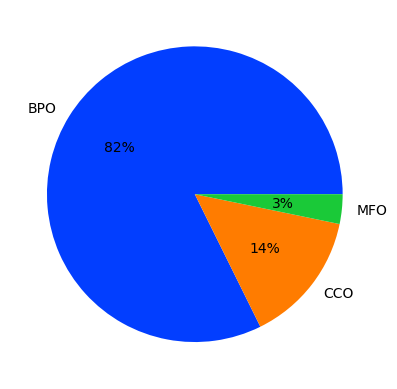

In [25]:
import seaborn as sns

pie_df = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('bright')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [28]:


for i in range(num_of_labels):

    n_train_terms = train_terms_updated[train_terms_updated['term'] ==  labels[-i]]
    
    # Получаем данные train_terms только для соответствующих label(GO term ID)
    label_related_proteins = n_train_terms['EntryID'].unique()
    
    # Если белок связан с меткой, то 1, иначе 0.
    # Заменяем i-й столбец train_Y   на pandas.
    train_labels[:,i] =  series_train_protein_ids.isin(label_related_proteins).astype(float)
    
# Преобразование train_Y numpy в pandas dataframe
labels_df = pd.DataFrame(data = train_labels, columns = labels)
print(labels_df.shape)
labels_df.head()

(142246, 1500)


,GO:0032179,GO:0030864,GO:0032703,GO:0000281,GO:0009226,GO:0031018,GO:0048593,GO:0022857,GO:0007259,GO:0048882,...,GO:0034656,GO:0002715,GO:0030666,GO:0008645,GO:0009185,GO:0009950,GO:0035017,GO:0031349,GO:0005721,GO:0035457
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import tensorflow as tf

INPUT_SHAPE = [train_df.shape[1]]
BATCH_SIZE = 5120

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=INPUT_SHAPE),    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=num_of_labels,activation='sigmoid')
])


# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy', tf.keras.metrics.AUC()],
)

history = model.fit(
    train_df, labels_df,
    batch_size=BATCH_SIZE,
    epochs=5
)

2023-07-30 21:59:43.418834: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 21:59:46.171067: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 21:59:52.726640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-30 22:00:00.222462: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1165279232 exceeds 10% of free system memory.
2023-07-30 22:00:01.337795: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1706952000 exceeds 10% of free system memory.


Epoch 1/5
28/28 [==============================] - 19s 557ms/step - loss: 0.1314 - binary_accuracy: 0.9588 - auc: 0.6459
Epoch 2/5
28/28 [==============================] - 15s 530ms/step - loss: 0.0194 - binary_accuracy: 0.9969 - auc: 0.8418
Epoch 3/5
28/28 [==============================] - 15s 541ms/step - loss: 0.0140 - binary_accuracy: 0.9970 - auc: 0.8870
Epoch 4/5
28/28 [==============================] - 14s 509ms/step - loss: 0.0130 - binary_accuracy: 0.9970 - auc: 0.8968
Epoch 5/5
28/28 [==============================] - 14s 511ms/step - loss: 0.0126 - binary_accuracy: 0.9970 - auc: 0.9020
